In [2]:
import pandas as pd
import numpy as np
df=pd.read_csv('C:/Users/H.A/Downloads/titanic.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
df.tail()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [6]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
print(df['Cabin'].value_counts())

B57 B59 B63 B66    3
B45                2
C89                2
C55 C57            2
A34                2
                  ..
E52                1
D30                1
E31                1
C62 C64            1
C105               1
Name: Cabin, Length: 76, dtype: int64


In [9]:
df['Cabin'].fillna('E45',inplace=True)
print(df['Cabin'].value_counts())

E45                328
B57 B59 B63 B66      3
C23 C25 C27          2
E34                  2
B45                  2
                  ... 
B10                  1
E52                  1
D30                  1
C62 C64              1
C105                 1
Name: Cabin, Length: 76, dtype: int64


In [10]:
df['Fare'].fillna(df['Fare'].mean(),inplace=True)
print(df['Cabin'].value_counts())
print(df['Sex'].value_counts())


E45                328
B57 B59 B63 B66      3
C23 C25 C27          2
E34                  2
B45                  2
                  ... 
B10                  1
E52                  1
D30                  1
C62 C64              1
C105                 1
Name: Cabin, Length: 76, dtype: int64
male      266
female    152
Name: Sex, dtype: int64


In [11]:
from sklearn.preprocessing import LabelEncoder
cleanup_num={
    'Sex':{"male":1, "female":1}
}
df.replace(cleanup_num,inplace=True)
df['Cabin']= LabelEncoder().fit_transform(df['Cabin'])
df['Embarked']= LabelEncoder().fit_transform(df['Embarked'])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",1,34.50000,0,0,330911,7.8292,63,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.00000,1,0,363272,7.0000,63,2
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.00000,0,0,240276,9.6875,63,1
3,895,0,3,"Wirz, Mr. Albert",1,27.00000,0,0,315154,8.6625,63,2
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.00000,1,1,3101298,12.2875,63,2
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",1,30.27259,0,0,A.5. 3236,8.0500,63,2
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",1,39.00000,0,0,PC 17758,108.9000,22,0
415,1307,0,3,"Saether, Mr. Simon Sivertsen",1,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,63,2
416,1308,0,3,"Ware, Mr. Frederick",1,30.27259,0,0,359309,8.0500,63,2


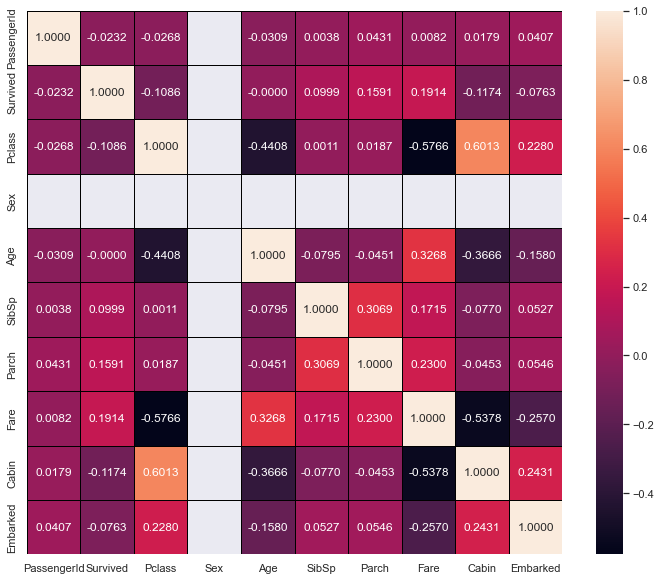

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)

f, ax = plt.subplots(figsize = (12,10))
sns.heatmap(df.corr(), annot = True, linewidths = 0.5, linecolor = "black", fmt = ".4f", ax = ax)
plt.show()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    int64  
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         418 non-null    float64
 10  Cabin        418 non-null    int32  
 11  Embarked     418 non-null    int32  
dtypes: float64(2), int32(2), int64(6), object(2)
memory usage: 36.0+ KB


In [14]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df[['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp','Parch', 'Fare', 'Cabin','Embarked']]=scaler.fit_transform(df[['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp','Parch', 'Fare', 'Cabin','Embarked']])
df.head()
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1.694763,0,0.873482,"Spector, Mr. Woolf",0.0,0.000000,-0.499470,-0.400248,A.5. 3236,-0.494448,0.388011,0.700767
414,1.703050,1,-1.505120,"Oliva y Ocana, Dona. Fermina",0.0,0.691586,-0.499470,-0.400248,PC 17758,1.313753,-2.387337,-1.642598
415,1.711337,0,0.873482,"Saether, Mr. Simon Sivertsen",0.0,0.651965,-0.499470,-0.400248,SOTON/O.Q. 3101262,-0.508792,0.388011,0.700767
416,1.719625,0,0.873482,"Ware, Mr. Frederick",0.0,0.000000,-0.499470,-0.400248,359309,-0.494448,0.388011,0.700767
417,1.727912,0,0.873482,"Peter, Master. Michael J",0.0,0.000000,0.616992,0.619896,2668,-0.237906,0.388011,-1.642598


In [15]:
#import relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
#features extraction
x = df[['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp','Parch', 'Fare', 'Cabin','Embarked']]
y = df['Survived']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)  
#splitting data with test size of 25%
logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.55


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

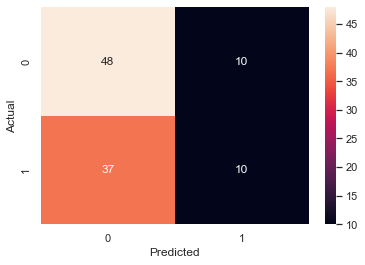

In [16]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [17]:
from sklearn.metrics import roc_auc_score, roc_curve
clf=LogisticRegression()
clf.fit(x_train, y_train) #Training
y_pred=clf.predict(x_test) #Predict
pred_prob=clf.predict_proba(x_test)
roc_auc_score(y_test, pred_prob[:, 1]) #Score AU

0.623624358033749

C:\Users\H.A\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


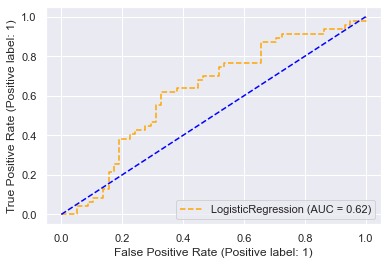

In [21]:
from sklearn import metrics
import matplotlib.pyplot as plt
#Visualisation de la courbe ROC
metrics.plot_roc_curve(clf, x_test, y_test, linestyle='--', color='orange')
#Courbe ROC pour fpr=tpr
random_probs = [0 for i in range(len(y_test))] #Génère des 0 y_test fois
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.show()